In [110]:
from MultiTrackingSystem import MultiTrackingSystem
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [111]:
texas_fame_path = r'/Users/czhui960/Documents/Lidar/to ZHIHUI/Texas median/2019-6-17-10-0-0-BF1(0-18000frames)/'

In [112]:
frame_path = r'/Users/czhui960/Documents/Lidar/to ZHIHUI/Texas median/2019-6-17-10-0-0-BF1(0-18000frames)/'
frame_names = os.listdir(frame_path)
frame_names.sort(key = lambda x : x.split(' ')[2][:-5])
frame_file_paths = [os.path.join(frame_path,frame_names[i]) for i in range(len(frame_names))]

In [115]:
multi_tracking.fit_dbgen?

Signature: multi_tracking.fit_dbgen(folder, frames_name, eps, min_samples)
Docstring: &lt;no docstring&gt;
File:      ~/Documents/Lidar/Lidar_Code/MultiTrackingSystem.py
Type:      method


In [113]:
frame_path = r'/Users/czhui960/Documents/Lidar/to ZHIHUI/Texas median/2019-6-17-10-0-0-BF1(0-18000frames)/'
frame_names = os.listdir(frame_path)
frame_names.sort(key = lambda x : x.split(' ')[2][:-5])
frame_file_paths = [os.path.join(frame_path,frame_names[i]) for i in range(len(frame_names))]
multi_tracking = MultiTrackingSystem(2400, tolerance= 4,gen_fig= False)
multi_tracking.fit_dbgen(frame_names,1,10)
multi_tracking.batch_tracking()
# multi_tracking.svae_gif()

TypeError: fit_dbgen() missing 1 required positional argument: &#39;min_samples&#39;

In [6]:
US_os = r'/Users/czhui960/Documents/Lidar/to ZHIHUI/US 395'
os.chdir(US_os)
US_folder = r'./frames/2019-8-27-7-0-0-BF1(0-18000frames)/{}'
US_frames_name = os.listdir(r'./frames/2019-8-27-7-0-0-BF1(0-18000frames)/')
US_frames_name.sort(key = lambda x : x.split(' ')[2][:-5])
multi_tracking = MultiTrackingSystem(2400, tolerance= 4,gen_fig= True)
multi_tracking.fit_dbgen(US_folder, US_frames_name,1,10)
multi_tracking.batch_tracking()
multi_tracking.svae_gif()

100%|██████████| 2399/2399 [08:53&lt;00:00,  4.50it/s]
Gif successfully saved


In [6]:
def cal_unit_area(dis):

    theta =np.pi * (2)/180
    alpha = np.pi * (0.2)/180
    H = 2 * dis * np.tan(theta/2)
    L = 2 * dis * np.sin(alpha/2)
    return H*L

In [14]:
    theta =np.pi * (2)/180
    alpha = np.pi * (0.2)/180

In [8]:
min_points = [2.66/cal_unit_area(dis) for dis in np.arange(1,80,0.1)]
max_points = [6.97/cal_unit_area(dis) for dis in np.arange(1,80,0.1)]
H_units = [2 * dis * np.tan(theta/2) for dis in np.arange(1,80,0.1)]
L_units = [2 * dis * np.sin(alpha/2) for dis in np.arange(1,80,0.1)]

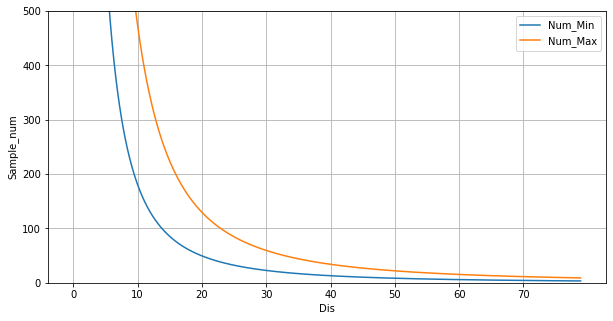

In [9]:
plt.figure(figsize=(10,5))
x = np.arange(1,80,.1)
plt.ylim(0,500)
plt.plot(min_points, label = 'Num_Min')
plt.plot(max_points, label = 'Num_Max')
plt.xticks(np.arange(0,len(min_points),100),np.arange(0,80,10))
plt.legend()
plt.xlabel('Dis')
plt.ylabel('Sample_num')
plt.grid()
plt.show()

In [10]:
H = [2 * dis * np.tan(theta/2) for dis in np.arange(1,80,0.5)]
L = [2 * dis * np.sin(alpha/2) for dis in np.arange(1,80,0.5)]

In [11]:
tabel = pd.DataFrame({
    'Dis':x,
    'L_unit':L_units,
    'H_unit':H_units,
    'Num_min':min_points,
    'Num_max':max_points
})

In [12]:
tabel.to_csv(r'/Users/czhui960/Documents/Lidar/point_cloud_table.csv')

In [9]:
length = []
for key in range(len(multi_tracking.out_of_tracking_list.keys())):
    length.append(len(multi_tracking.out_of_tracking_list[key].detected_centers))
    

In [15]:
length = np.array(length)

In [50]:
length.argmax()

368

In [56]:
x_lim = [-80, 70]
y_lim = [-20, 60]

In [91]:
def show_detected_traj(obj):
    plt.figure(figsize=(10,5))
    # plt.ylim(y_lim[0],y_lim[1]) # figure height is 80
    # plt.xlim(x_lim[0],x_lim[1]) # length is 150
    detected_centers = np.concatenate([obj.detected_centers[i].reshape(1,-1) for i in range(len(obj.detected_centers)) if type              (obj.detected_centers[i]) != int])
    estimated_centers = np.concatenate([obj.estimated_centers[i].reshape(1,-1) for i in range(len(obj.estimated_centers))])
    detected_point_clouds = np.concatenate([obj.point_clouds[i] for i in range(len(obj.detected_centers)) if type(obj.detected_centers[i]     ) != int])
    detected_box = [obj.bounding_boxes[i] for i in range(len(obj.detected_centers)) if type(obj.detected_centers[i]) != int]
    plt.plot(estimated_centers[:,0],estimated_centers[:,1],marker = 'o',label = 'Est')
    plt.plot(detected_centers[:,0],detected_centers[:,1], marker = 'x', label = 'Mea')
    plt.legend(fontsize = 20)
    # plt.scatter(detected_point_clouds[:,0],detected_point_clouds[:,1],s = 3)
    # for i in range(len(detected_box)):
    #     plt.plot(detected_box[i][:,0],detected_box[i][:,1],c = 'r',alpha = 0.3) # box
    #     plt.plot(detected_box[i][[0,-1],0],detected_box[i][[0,-1],1],c = 'r',alpha = 0.3)
    plt.show()

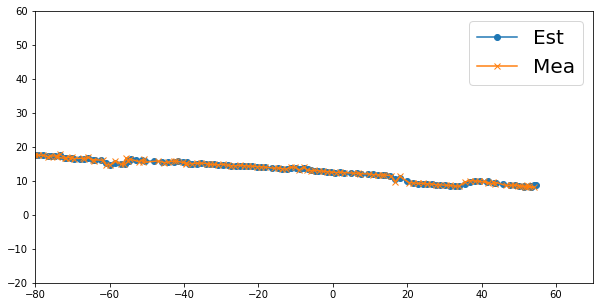

In [92]:
obj = multi_tracking.out_of_tracking_list[57]
show_detected_traj(obj)

In [12]:
from sklearn.cluster import DBSCAN
from matplotlib import cm

In [100]:
test = np.array(pd.read_csv(folder.format(frames_name[579])).loc[:,['X','Y']])

In [101]:
nearest = []
for i in range(len(test)):
    nearest.append(np.sort(np.sqrt(np.sum((test[i] - test)**2,axis = 1)))[1])

In [102]:
np.argmax(np.diff(np.sort(nearest)))

1953

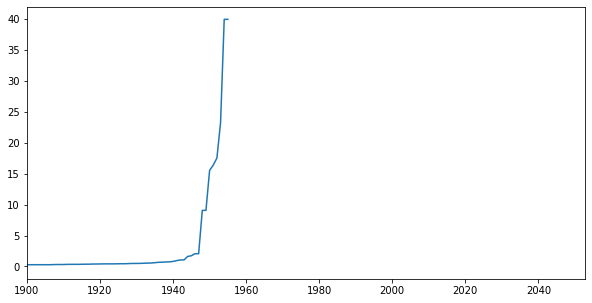

In [342]:
plt.figure(figsize=(10,5))
plt.plot(np.sort(nearest))
plt.xlim(1900)
plt.show()

In [343]:
np.sort(nearest)[1900:]

array([ 0.27410295,  0.27974947,  0.28069795,  0.28133625,  0.28133625,
        0.28148518,  0.28148518,  0.29242718,  0.31287578,  0.31287578,
        0.31310871,  0.33732597,  0.34191123,  0.34292898,  0.34292898,
        0.35450635,  0.36643178,  0.36708157,  0.38966237,  0.39553022,
        0.40510211,  0.41769107,  0.41769107,  0.42021502,  0.42021502,
        0.43354306,  0.44000528,  0.44000528,  0.46919848,  0.48481019,
        0.48867153,  0.49598938,  0.52001655,  0.53989653,  0.55786719,
        0.61103727,  0.66690839,  0.68665331,  0.72697001,  0.74403773,
        0.81491592,  0.94556938,  1.05264745,  1.05419644,  1.61789302,
        1.73124285,  2.06096764,  2.06096764,  9.0723623 ,  9.0723623 ,
       15.54573976, 16.393817  , 17.54269097, 23.26630284, 39.97842275,
       39.97842275])

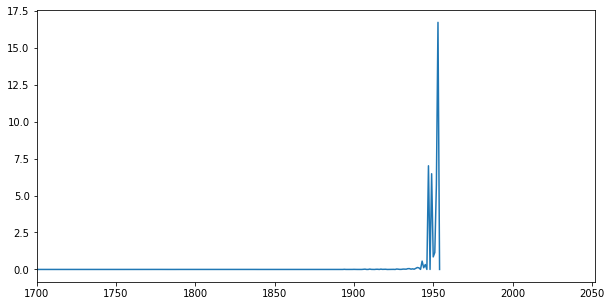

In [97]:
plt.figure(figsize=(10,5))
plt.plot(np.diff(np.sort(nearest)))
plt.xlim(1700)
plt.show()

In [59]:
d_std = 52.2
L_std = 0.18
min_point_std = 8

In [60]:
def modified_metric(v1,v2):
    d_std = 52.2
    if v1[2]>v2[2]:
        shorter = v2
        longer = v1
    else:
        shorter = v1
        longer = v2
    dis = np.sqrt(np.sum(((shorter[2]/d_std)*(shorter[:2] - longer[:2]))**2))
    # dis = np.sqrt(np.sum(((shorter[2]/d_std)*(shorter[[0,1]]-longer[[0,1]]))**2))
    return dis

In [36]:
from sklearn.cluster import DBSCAN
texas_os = r'/Users/czhui960/Documents/Lidar/to ZHIHUI/Texas median'
os.chdir(texas_os)
texas_folder = r'./2019-6-17-10-0-0-BF1(0-18000frames)/{}'
texas_frames_name = os.listdir(r'./2019-6-17-10-0-0-BF1(0-18000frames)/')
texas_frames_name.sort(key = lambda x : x.split(' ')[2][:-5])

In [53]:
point_cloud = np.array(pd.read_csv(texas_folder.format(texas_frames_name[580])).loc[:,['X','Y']])
label = DBSCAN(eps=0.4,min_samples=3).fit_predict(X = point_cloud)
uniq_label = np.unique(label)

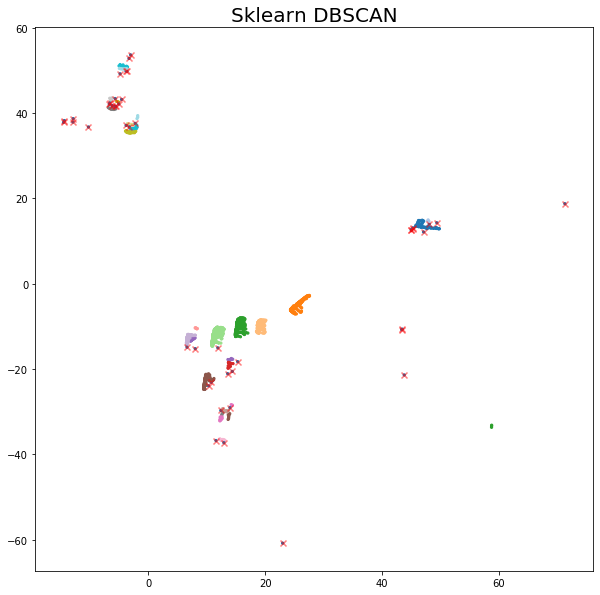

In [54]:
label = DBSCAN(eps=0.4,min_samples=3).fit_predict(X = point_cloud)
plt.figure(figsize=(10,10))
plt.scatter(point_cloud[:,0],point_cloud[:,1],c = label,s = 5, cmap = cm.tab20)
plt.scatter(point_cloud[:,0][label==-1],point_cloud[:,1][label==-1],c = 'r', marker='x',alpha = 0.5)
plt.title(r'Sklearn DBSCAN',fontsize = 20)
plt.show()


In [18]:
from sklearn.cluster._dbscan_inner import dbscan_inner
from sklearn.neighbors import NearestNeighbors
from matplotlib import cm

In [20]:
point_cloud = np.array(pd.read_csv(texas_folder.format(texas_frames_name[579])).loc[:,['X','Y']])
neighbors_model = NearestNeighbors(radius=1,leaf_size=30,p = 2)
neighbors_model.fit(point_cloud)
neighborhoods = neighbors_model.radius_neighbors(point_cloud,return_distance=False)
n_neighbors = np.array([len(n) for n in neighborhoods])
core_samples = np.asarray(n_neighbors >= 10,dtype=np.uint8)
labels = np.full(point_cloud.shape[0], -1, dtype=np.intp)
dbscan_inner(core_samples, neighborhoods, labels)

In [57]:
radius

0.3148508872154358

In [79]:
US_os = r'/Users/czhui960/Documents/Lidar/to ZHIHUI/US 395'
os.chdir(US_os)
US_folder = r'./frames/2019-8-27-7-0-0-BF1(0-18000frames)/{}'

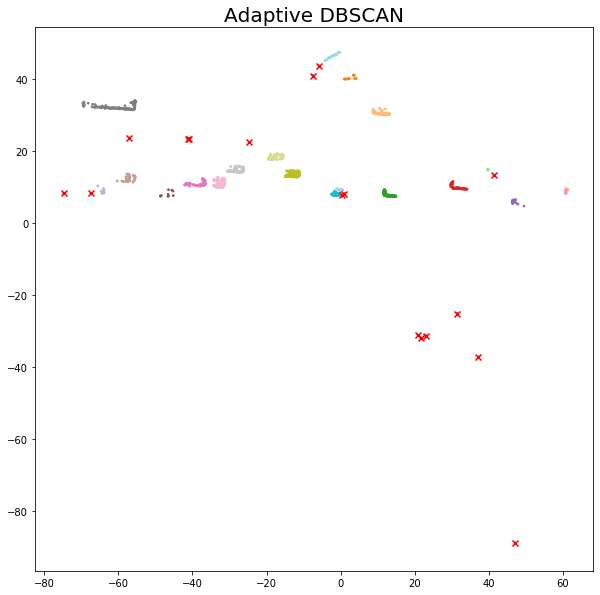

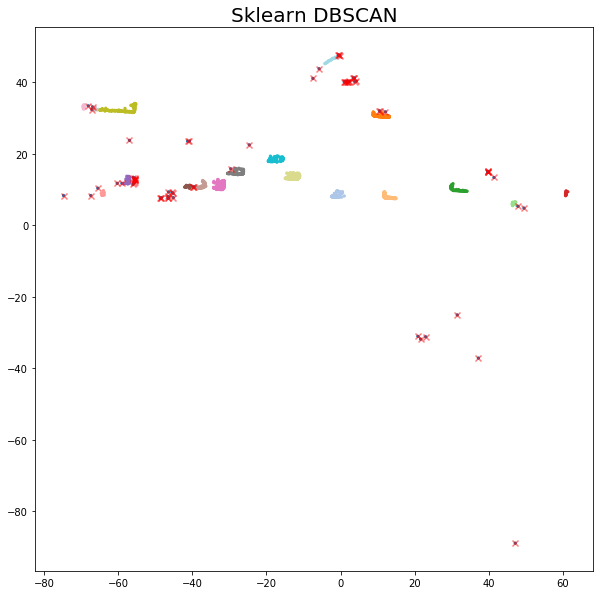

In [88]:
point_cloud = np.array(pd.read_csv(US_folder.format(US_frames_name[1])).loc[:,['X','Y','distance_m']])
neighborhoods = []
for i in range(len(point_cloud)):
    radius = 13.21 * point_cloud[i,2] * np.sin(alpha/2)*1.67 
    neighbors_model = NearestNeighbors(radius=radius,leaf_size=30,p = 2)
    neighbors_model.fit(point_cloud[:,:2])
    neighborhood = neighbors_model.radius_neighbors(point_cloud[i,:2].reshape(1,-1),return_distance=False)
    neighborhoods.append(neighborhood[0])
neighborhoods = np.array(neighborhoods)
n_neighbors = np.array([len(n) for n in neighborhoods])
min_points = 5000*point_cloud[:,2]**(-1.105) - 150
core_samples = np.asarray(n_neighbors >= 5,dtype=np.uint8)
labels = np.full(point_cloud.shape[0], -1, dtype=np.intp)
dbscan_inner(core_samples, neighborhoods, labels)
plt.figure(figsize=(10,10))
plt.scatter(point_cloud[:,0],point_cloud[:,1],c = labels,s = 3, cmap = cm.tab20)
plt.scatter(point_cloud[:,0][labels==-1],point_cloud[:,1][labels==-1],c = 'r', marker='x')
plt.title(r'Adaptive DBSCAN',fontsize = 20)
plt.show()
label = DBSCAN(eps=1,min_samples=10).fit_predict(X = point_cloud)
plt.figure(figsize=(10,10))
plt.scatter(point_cloud[:,0],point_cloud[:,1],c = label,s = 5, cmap = cm.tab20)
plt.scatter(point_cloud[:,0][label==-1],point_cloud[:,1][label==-1],c = 'r', marker='x',alpha = 0.5)
plt.title(r'Sklearn DBSCAN',fontsize = 20)
plt.show()



In [15]:
%%timeit
neighbors_model = NearestNeighbors(
        radius=1, algorithm='auto',
        leaf_size=30, metric='euclidean',
        metric_params=None, p=2, n_jobs=None)
neighbors_model.fit(point_cloud)
    # This has worst case O(n^2) memory complexity
neighborhoods = neighbors_model.radius_neighbors(point_cloud[:1000],
                                                        return_distance=False)

5.97 ms ± 29.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
%%timeit
neighborhoods = []
for i in range(1000):
    neighbors_model = NearestNeighbors(
            radius=1, algorithm='auto',
            leaf_size=30, metric='euclidean',
            metric_params=None, p=2, n_jobs=None)
    neighbors_model.fit(point_cloud)
        # This has worst case O(n^2) memory complexity
    neighborhood = neighbors_model.radius_neighbors(point_cloud[i].reshape(-1,2),                                            return_distance=False)
    neighborhoods.append(neighborhood)

838 ms ± 38.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [96]:
len(neighborhoods)

1000